In [61]:
# For the next exercise you are going to use the Airline Costs dataset 
# available to download  from OA 4.9. The dataset has the following 
# attributes, among others:  
#
#     • airline name  
#     • length of flight in miles  
#     • speed of plane in miles per hour  
#     • daily flight time per plane in hours  
#     • customers served (in thousands)  
#     • total operating cost in cents per revenue ton-mile  
#     • total assets in $100,000s  
#     • investments and special funds in $100,000s.  
#
# Use a linear regression model to predict the number of customers each 
# airline serves using the length of the flight and daily flight time 
# per plane. 
#
# Next, build another regression  model to predict the total 
# assets of an airline from the customers served by the airline. Do  you
# have any insight into the data from the last two regression models? 

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

# Assuming the columns are in the order listed in the problem. This was not specified anywhere.
colnames = ["Name", "Length", "Speed", "Time", "Cust", "Cost", "Assets", "Funds", "XCol1", "XCol2", "XCol3", "XCol4"]

# Load and print dataset to ensure data is clean, numeric, and I know what columns are available
df = pd.read_csv('../Datasets/Code_and_Data_(Chapter_04)/Code and Data (Chapter 04)/airline_costs_new.txt', 
                 header=None, delimiter="\s+", names=colnames)
# print(df)

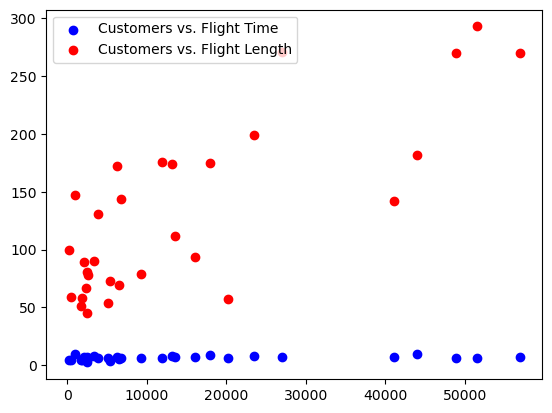

In [63]:
# Visualize the data
plt.figure(1)
plt.scatter(df.Cust, df.Time, color="blue", label="Customers vs. Flight Time") 
plt.scatter(df.Cust, df.Length, color="red", label="Customers vs. Flight Length")
plt.legend()

In [64]:
# Load the Linear Regression model
y = df.Cust
X = df[['Time', 'Length']]
X = sm.add_constant(X)

lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cust   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     23.00
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.23e-06
Time:                        23:49:36   Log-Likelihood:                -330.06
No. Observations:                  31   AIC:                             666.1
Df Residuals:                      28   BIC:                             670.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7792.0706   8396.998     -0.928      0.3

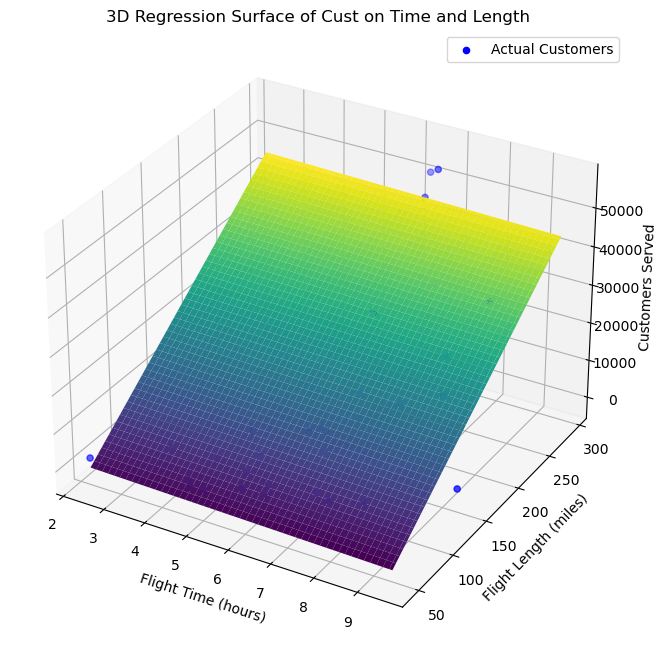

In [65]:
# Let us plot the regression line (3D hyperplane needed for 2 independent variables)

# Define ranges for the hyperplane based on your data
time_range = np.linspace(min(X['Time']), max(X['Time']), 100)
length_range = np.linspace(min(X['Length']), max(X['Length']), 100)

# Create the mesh grid
time_grid, length_grid = np.meshgrid(time_range, length_range)

# Reshape the mesh grid into a 2D array for prediction
grid_points = np.c_[time_grid.ravel(), length_grid.ravel()]
grid_points = sm.add_constant(grid_points)

# Predict customer cost for all points in the grid
predicted_cost = lr_model.predict(grid_points)

# Reshape the predicted cost back into the shape of the mesh grid
predicted_cost_grid = predicted_cost.reshape(time_grid.shape)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface using the mesh grid and predicted cost
ax.plot_surface(time_grid, length_grid, predicted_cost_grid, cmap='viridis')

# Scatter plot of original data points (optional)
ax.scatter(X['Time'], X['Length'], df['Cust'], color='blue', label='Actual Customers')  # Uncomment if desired

# Customize the plot
ax.set_xlabel('Flight Time (hours)')
ax.set_ylabel('Flight Length (miles)')
ax.set_zlabel('Customers Served')
ax.set_title('3D Regression Surface of Cust on Time and Length')
plt.legend()
plt.grid(True)

plt.show()

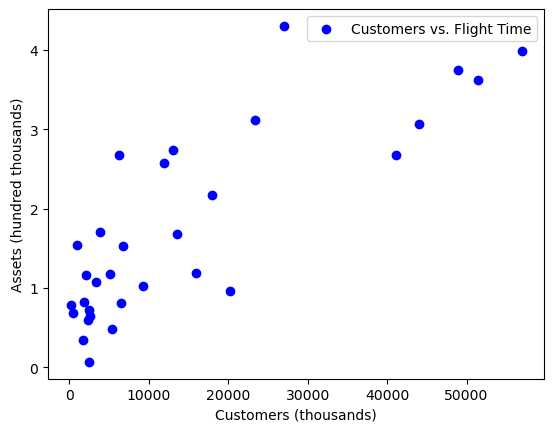

In [76]:
#                                                                                          #
#                                         PART 2                                           #
#                                                                                          #

# Visualize the data
plt.figure(1)
plt.scatter(df.Cust, df.Assets, color="blue", label="Customers vs. Flight Time") 
plt.ylabel("Assets (hundred thousands)")
plt.xlabel("Customers (thousands)")
plt.legend()

In [67]:
# Create the linear regression model for predicting 'assets' with 'cust'
y = df.Assets
X = df.Cust
X = sm.add_constant(X)

lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

# The results of this regression show an R-squared of .667, which is pretty moderate. 
# We do observe a condition number that is very high, which raises concerns about the model.

                            OLS Regression Results                            
Dep. Variable:                 Assets   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     58.14
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           2.09e-08
Time:                        23:49:38   Log-Likelihood:                -31.866
No. Observations:                  31   AIC:                             67.73
Df Residuals:                      29   BIC:                             70.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8937      0.167      5.353      0.0

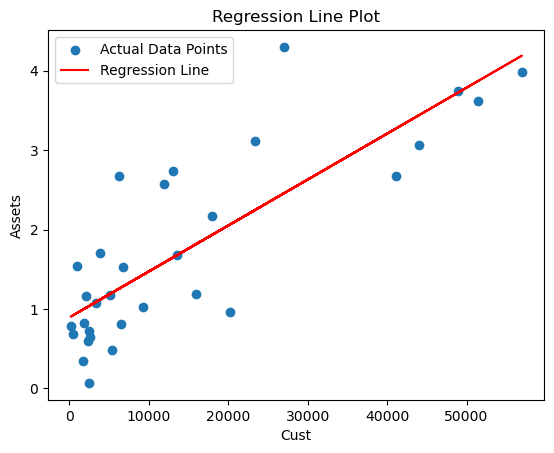

In [75]:
# Plot regression line
plt.scatter(df['Cust'], df['Assets'], label='Actual Data Points')
plt.plot(df['Cust'], lr_model.predict(X), color='red', label='Regression Line')
plt.xlabel('Cust')
plt.ylabel('Assets')
plt.title('Regression Line Plot')
plt.legend()
plt.show()

# This plot of the regression line compared to the data points shows the following:
#
#   - The positive slope indicates a positive correlation between the independent and dependent variables
#   - The scatter of the data points around the regression line indicates a loose relationship between the 
#     independent and dependent variables, indicating that linear regression may not be the best modelling 
#     technique for this data

# From these two datasets I can conclude that longer flights -> more customers -> more assets